In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
iris_df['flower type'] = iris.target

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   flower type        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [9]:
#Stratified shuffle split

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
strata = StratifiedShuffleSplit()

In [12]:
for train_index, test_index in strata.split(iris_df.drop('flower type', axis= 1),iris_df[['flower type']]):
    X_train, X_test = iris_df.drop('flower type', axis= 1).iloc[train_index,:], iris_df.drop('flower type', axis= 1).iloc[test_index]
    y_train, y_test = iris_df[['flower type']].iloc[train_index], iris_df[['flower type']] .iloc[test_index]

In [13]:
train_index.shape

(135,)

In [14]:
X_train.shape[1] == X_test.shape[1]

True

In [15]:
y_train.value_counts()

flower type
0              45
1              45
2              45
dtype: int64

In [16]:
##EDA

In [17]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
113,5.7,2.5,5.0,2.0
133,6.3,2.8,5.1,1.5
136,6.3,3.4,5.6,2.4
69,5.6,2.5,3.9,1.1
129,7.2,3.0,5.8,1.6


In [18]:
d = X_train
d['target'] = y_train

In [19]:
d

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
113,5.7,2.5,5.0,2.0,2
133,6.3,2.8,5.1,1.5,2
136,6.3,3.4,5.6,2.4,2
69,5.6,2.5,3.9,1.1,1
129,7.2,3.0,5.8,1.6,2
...,...,...,...,...,...
28,5.2,3.4,1.4,0.2,0
90,5.5,2.6,4.4,1.2,1
146,6.3,2.5,5.0,1.9,2
131,7.9,3.8,6.4,2.0,2


<AxesSubplot:xlabel='target', ylabel='petal width (cm)'>

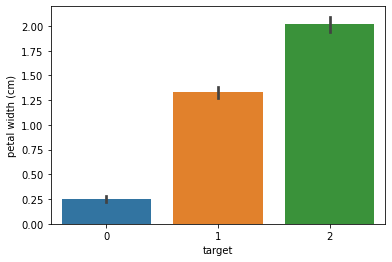

In [20]:
sns.barplot(y= 'petal width (cm)', x = 'target', data= d)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='target', ylabel='petal width (cm)'>

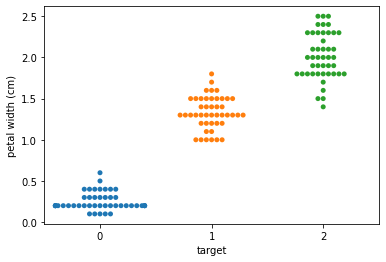

In [21]:
sns.swarmplot(x = 'target',y= 'petal width (cm)', data= d)

<AxesSubplot:>

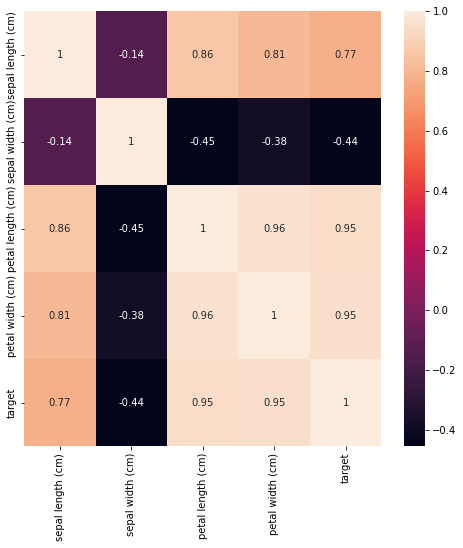

In [22]:
plt.figure(figsize= (8,8))
sns.heatmap(d.corr(), annot = True)

In [23]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [24]:
svmodel = SVC(probability=True)
dtmodel = DecisionTreeClassifier()

In [25]:
X_train.drop('target',axis=1,inplace=True)

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [2,10,12,5,3]}
g = GridSearchCV(svmodel, param_grid,cv=5)

In [27]:
g.fit(X_train,y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [2, 10, 12, 5, 3]})

In [28]:
g.best_estimator_

SVC(C=10, probability=True)

In [29]:
g.best_score_

0.9703703703703702

In [30]:
g.best_estimator_

SVC(C=10, probability=True)

In [31]:
param_grid = {'max_depth':[2,3,4,5],'criterion':['gini','entropy'], 'min_samples_leaf':[10,15,25,20,30], 'max_leaf_nodes':[4,3,2,5]}

In [32]:
d = GridSearchCV(dtmodel, param_grid,cv = 5)
d.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [4, 3, 2, 5],
                         'min_samples_leaf': [10, 15, 25, 20, 30]})

In [33]:
d.best_estimator_

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4, min_samples_leaf=10)

In [34]:
d.best_score_

0.9259259259259259

In [35]:
#Model Evaluation

In [36]:
from sklearn.metrics import classification_report, accuracy_score 

In [37]:
svm = SVC(C= 10, probability= True)
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [39]:
accuracy_score(y_pred,y_test)

1.0

In [40]:
dt = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4, min_samples_leaf=15)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

In [41]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [ ]:
###100 percent model for both, lol.